Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [ ]:
df = pd.read_csv("/content/Month_Value_1.csv")
df.head(10)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0
7,01.08.2015,1.520498e+07,8642.0,1759.428870,30024676.0
8,01.09.2015,2.060394e+07,16144.0,1276.259909,30024676.0
9,01.10.2015,2.099287e+07,18135.0,1157.588904,30024676.0


Changing the period column into DateTime data type

In [ ]:
# setting period as PeriodIndex with monthly freq
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df['Period'] = df.Period.dt.to_period('M')
df.set_index('Period', inplace=True)

df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08,NaN,NaN,NaN,NaN
2022-09,NaN,NaN,NaN,NaN
2022-10,NaN,NaN,NaN,NaN


Data Exploration and Forecast Horizon

In [ ]:
print(df.isna().sum())

Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64


Forecast horizon

In [ ]:
test = df[-32:]
train = df[:len(df)-32]

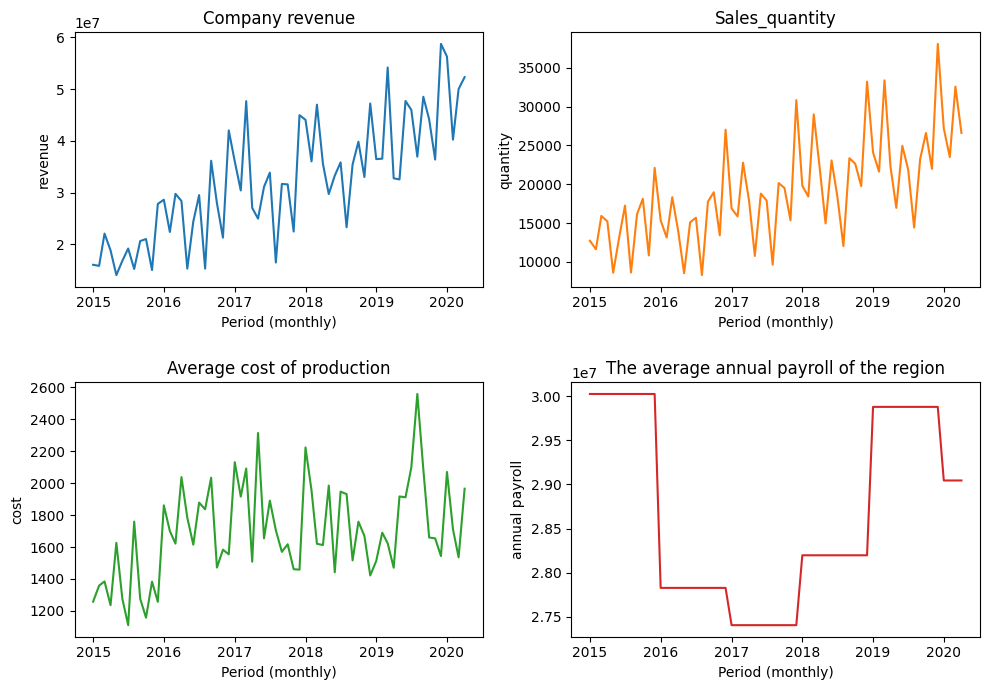

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(train.index.to_timestamp(), train["Revenue"])
axs[0, 0].set_title("Company revenue")
axs[0, 0].set_xlabel("Period (monthly)")
axs[0, 0].set_ylabel("revenue")

axs[0, 1].plot(train.index.to_timestamp(), train["Sales_quantity"], 'tab:orange')
axs[0, 1].set_title("Sales_quantity")
axs[0, 1].set_xlabel("Period (monthly)")
axs[0, 1].set_ylabel("quantity")

axs[1, 0].plot(train.index.to_timestamp(), train["Average_cost"], 'tab:green')
axs[1, 0].set_title("Average cost of production")
axs[1, 0].set_xlabel("Period (monthly)")
axs[1, 0].set_ylabel("cost")

axs[1, 1].plot(train.index.to_timestamp(), train["The_average_annual_payroll_of_the_region"], 'tab:red')
axs[1, 1].set_title("The average annual payroll of the region")
axs[1, 1].set_xlabel("Period (monthly)")
axs[1, 1].set_ylabel("annual payroll")

plt.tight_layout()

plt.show()

Correlation

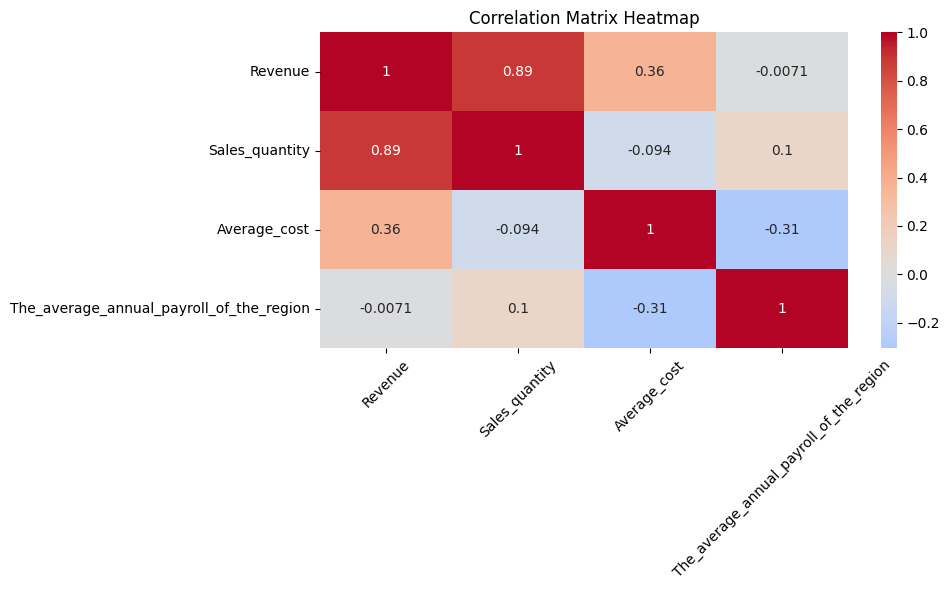

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Examine the Trends

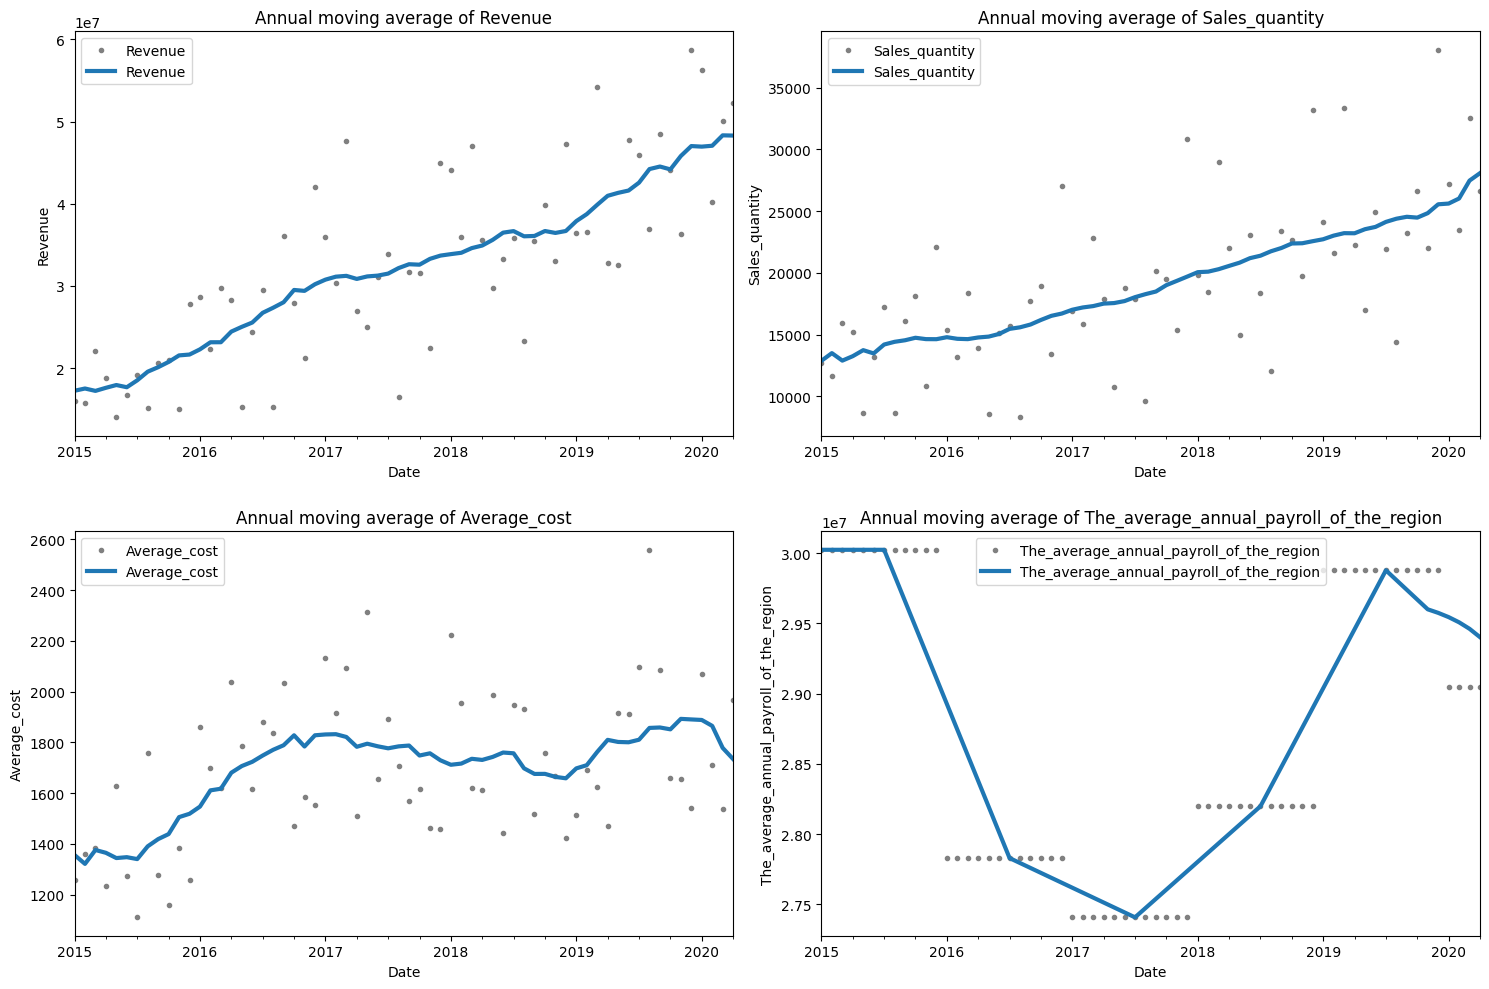

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

moving_averages = []

for i, column in enumerate(train.columns):
    moving_avg = train[column].rolling(window=12, center=True, min_periods=6).mean()

    moving_averages.append(moving_avg)

    ax = train[column].plot(ax=axes[i], style=".", color="0.5", title=column, legend=True)
    moving_avg.plot(ax=ax, linewidth=3, title=f"Annual moving average of {column}", legend=True)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

Check for Seasonality

Text(0.5, 0, 'Year')

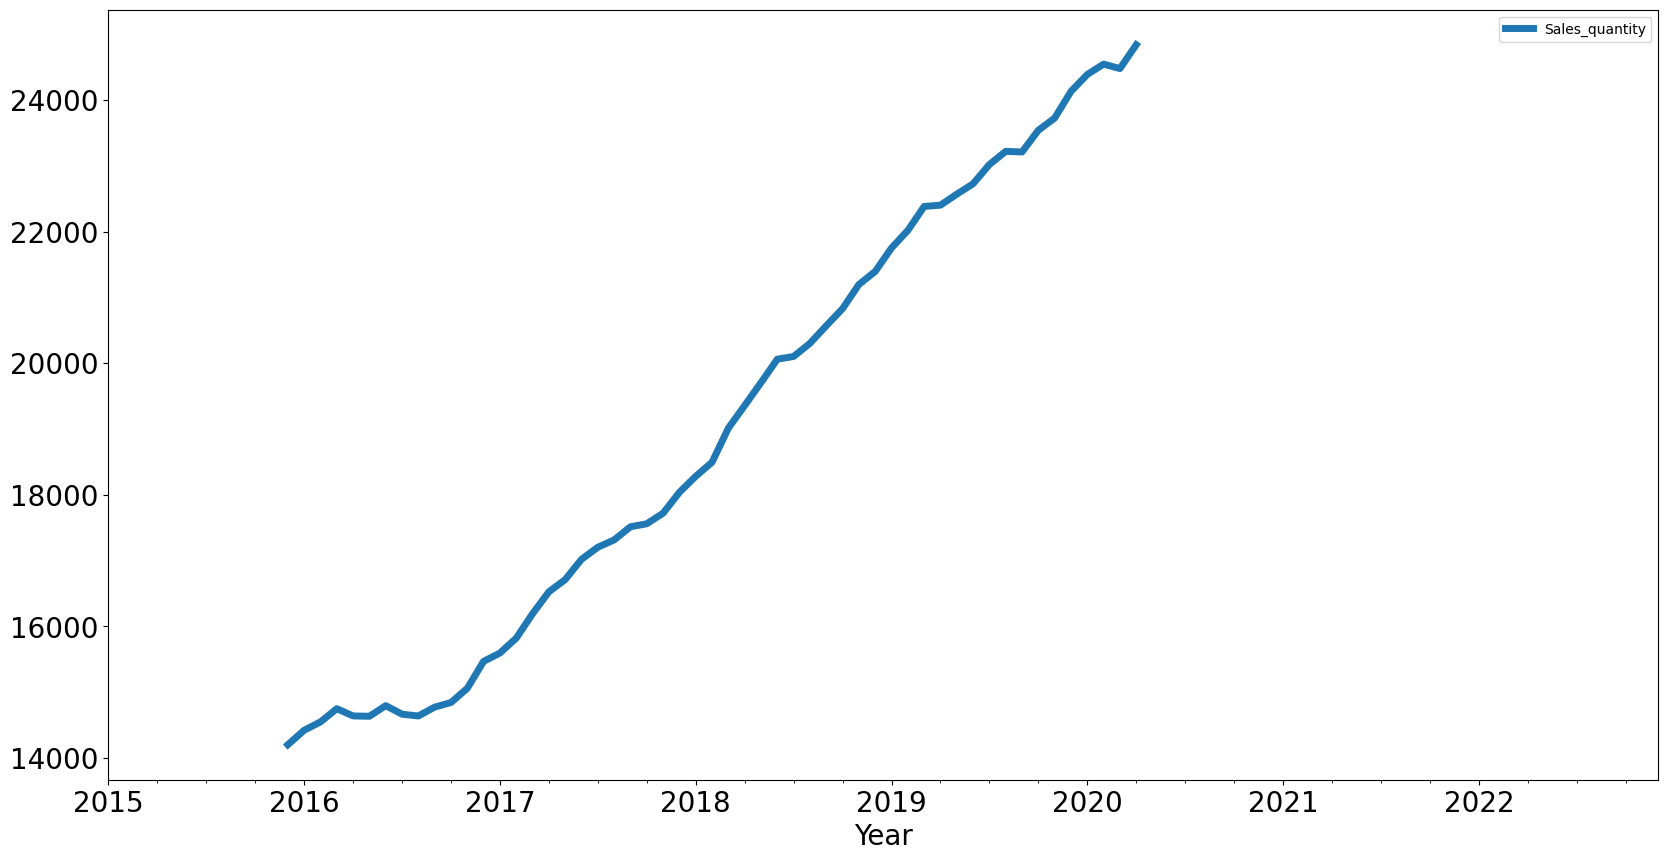

In [ ]:
Sales_quantity = df[['Sales_quantity']]
Sales_quantity.rolling(12).mean().plot(figsize=(20,10),linewidth = 5,fontsize=20)
plt.xlabel('Year',fontsize=20)